In [1]:
#RESISTENCIA 142.6 OHM
import numpy as np
import matplotlib.pyplot as plt
import scipy.special
import scipy.optimize

In [6]:
#T INICIAL 20°C
#ALIMENTO CON 60V
#MIDO CADA 1min

T1_1=np.array([19.9,29,36.7,41.7,45.7,48.8,51.2,53.1,54.9,56.5,57.7,59,60.1,61]) #suncho
T2_1=np.array([19.2,19.2,19.2,19.2,19.3,19.3,19.3,19.3,19.3,19.5,19.6,19.6,19.8,20]) #centro
T3_1=np.array([19.7,19.7,19.7,19.8,19.8,19.8,19.9,19.9,20.1,20.2,20.4,20.7,20.9,21.1]) #costado
T4_1=np.array([20.2,20.2,20.3,20.4,20.5,20.6,20.7,20.9,21.1,21.3,21.6,22,22.2,22.5]) #costado

#Medía así y después me di cuenta que alta fiaca, y empecé a medir con txt jaja
T1_2,T2_2,T3_2,T4_2=np.loadtxt('medicion_1', delimiter=',', skiprows=1, unpack=True)

T1=np.concatenate([T1_1,T1_2])
T2=np.concatenate([T2_1,T2_2])
T3=np.concatenate([T3_1,T3_2])
T4=np.concatenate([T4_1,T4_2])

tiempo=np.arange(0,len(T1_1)+len(T1_2),1)

#Tuve una interrupción de aprox 5 minutos, volví a medir en otro archivo:
T1_3,T2_3,T3_3,T4_3=np.loadtxt('medicion_2', delimiter=',', skiprows=0, unpack=True)
tiempo2=np.arange(len(tiempo)+2,len(tiempo)+2+len(T1_3))

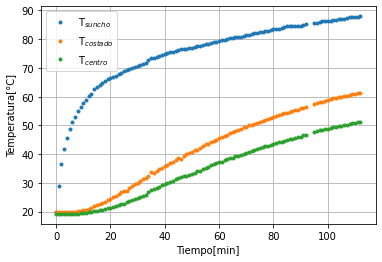

In [7]:
plt.plot(tiempo,T1,'.',label='T$_{suncho}$')
plt.plot(tiempo,T3,'.',label='T$_{costado}$')
#plt.plot(tiempo,T4,'.',label='T_costado2')
plt.plot(tiempo,T2,'.',label='T$_{centro}$')

plt.plot(tiempo2,T1_3,'.',color='tab:blue')
plt.plot(tiempo2,T3_3,'.',color='tab:orange')
#plt.plot(tiempo,T4,'.',label='T_costado2')
plt.plot(tiempo2,T2_3,'.',color='tab:green')

plt.xlabel('Tiempo[min]')
plt.ylabel('Temperatura[°C]')
plt.legend()
plt.grid(True)
plt.show()

In [4]:
#AJUSTO

<ipython-input-7-6713c05499ed>:6: RuntimeWarning: divide by zero encountered in true_divide
  termino2=x*scipy.special.erf(x/(4*abs(k)*t)**0.5)
<ipython-input-7-6713c05499ed>:6: RuntimeWarning: divide by zero encountered in true_divide
  termino2=x*scipy.special.erf(x/(4*abs(k)*t)**0.5)
<ipython-input-7-6713c05499ed>:6: RuntimeWarning: divide by zero encountered in true_divide
  termino2=x*scipy.special.erf(x/(4*abs(k)*t)**0.5)


k,A,B: [-1.16672349e-05 -1.95948883e+03  1.17284997e+02]
k,A,B: [-1.49393015e-05 -2.15150303e+03  1.27506176e+02]


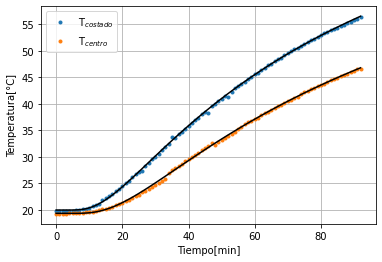

In [7]:
x=5/100

#k difusividad, A=flujo/conductividad
def ajuste(t,k,A,B):
    #termino1=np.exp(x**2 /(4*k*t))*(k*t/np.pi)**0.5
    termino2=x*scipy.special.erf(x/(4*abs(k)*t)**0.5)
    return A*termino2 + B
           
params2,extras2 = scipy.optimize.curve_fit(ajuste,tiempo,T2)
params3,extras3 = scipy.optimize.curve_fit(ajuste,tiempo,T3)

print('k,A,B:',params2)
print('k,A,B:',params3)

plt.plot(tiempo,T3,'.',label='T$_{costado}$')
plt.plot(tiempo,ajuste(tiempo,params3[0],params3[1],params3[2]),color='black')

plt.plot(tiempo,T2,'.',label='T$_{centro}$',color='tab:orange')
plt.plot(tiempo,ajuste(tiempo,params2[0],params2[1],params2[2]),color='black')

plt.grid(True)
plt.xlabel('Tiempo[min]')
plt.ylabel('Temperatura[°C]')
plt.legend()
plt.show()

### Enfriamiento

Apagué el variac y medí el enfriamiento y a ver cuánto tiempo tardó en responder el centro

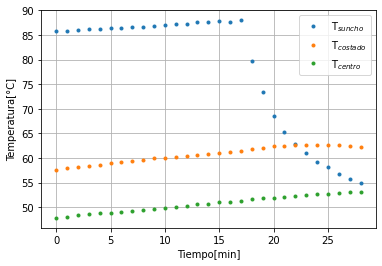

In [6]:
E1,E2,E3,E4=np.loadtxt('medicion_3', delimiter=',', skiprows=0, unpack=True)
tiempo_E=np.arange(0,len(E1),1)



plt.plot(len(tiempo2)+tiempo_E,E1,'.',label='T$_{suncho}$')
plt.plot(len(tiempo2)+tiempo_E,E3,'.',label='T$_{costado}$')
#plt.plot(len(tiempo2)+tiempo_E,E4,'.',label='T_costado2')
plt.plot(len(tiempo2)+tiempo_E,E2,'.',label='T$_{centro}$')

plt.plot(tiempo2-tiempo2[0],T1_3,'.',color='tab:blue')
plt.plot(tiempo2-tiempo2[0],T3_3,'.',color='tab:orange')
plt.plot(tiempo2-tiempo2[0],T2_3,'.',color='tab:green')


plt.xlabel('Tiempo[min]')
plt.ylabel('Temperatura[°C]')
plt.legend()
plt.grid(True)
plt.show()